In [1]:
## main libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## sklearn  --> follow my method when importing from sklearn
## metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Algorithms
from sklearn.linear_model import LinearRegression, SGDRegressor

## preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
## Some random Dataset --> X is the Feature, y is the target
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
## we have two thetas (theta_0, theta_1)
## Add a column contains one in X
X_final = np.insert(arr=X, obj=0, values=1, axis=1)

In [4]:
## apply the equation
thetas = (np.linalg.inv(X_final.T @ X_final) @ X_final.T) @ y

print('thetas \n', thetas)

thetas 
 [[3.53509653]
 [3.51220546]]


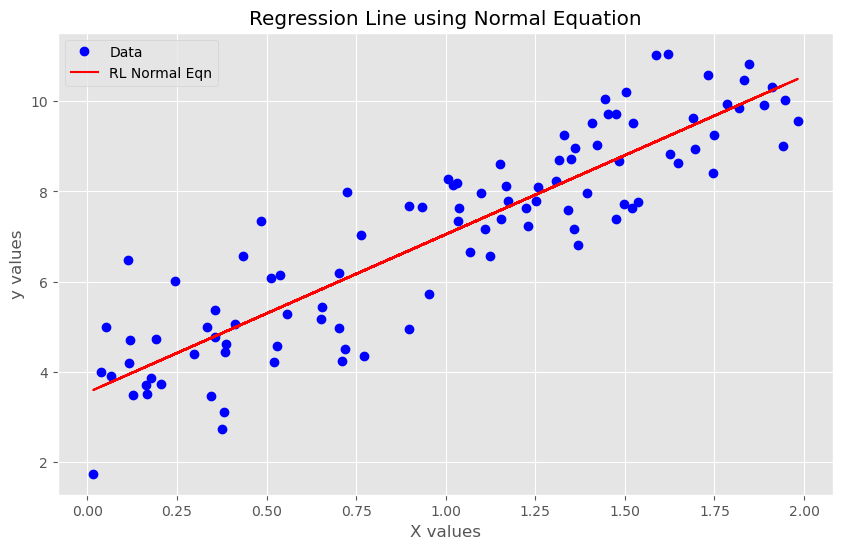

In [5]:
## to get the prediction using normal equation
y_pred_normal = X_final @ thetas

## plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo', label='Data')
plt.plot(X, y_pred_normal, c='r', label='RL Normal Eqn')
plt.title('Regression Line using Normal Equation')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [6]:
## Check MSE & MAE & R2 Score
mse_normal = mean_squared_error(y_true=y, y_pred=y_pred_normal)
mae_normal = mean_absolute_error(y_true=y, y_pred=y_pred_normal)
r2_normal = r2_score(y_true=y, y_pred=y_pred_normal)

print(f'MSE using Normal Eqn -->  {mse_normal: .4f}')
print(f'MAE using Normal Eqn --> {mae_normal: .4f}')
print(f'R2 score usign Normal Eqn -->  {r2_normal: .4f} %')

MSE using Normal Eqn -->   0.9948
MAE using Normal Eqn -->  0.8137
R2 score usign Normal Eqn -->   0.8021 %


### Linea Regression using Least Squares (ls)

In [7]:
lin_reg = LinearRegression()  ## take an instance of the class
lin_reg.fit(X, y)  ## train the model

LinearRegression()

In [8]:
theta_1 = lin_reg.coef_
theta_0 = lin_reg.intercept_

print('theta_1 --> ', theta_1)
print('theta_0 --> ', theta_0)

theta_1 -->  [[3.51220546]]
theta_0 -->  [3.53509653]


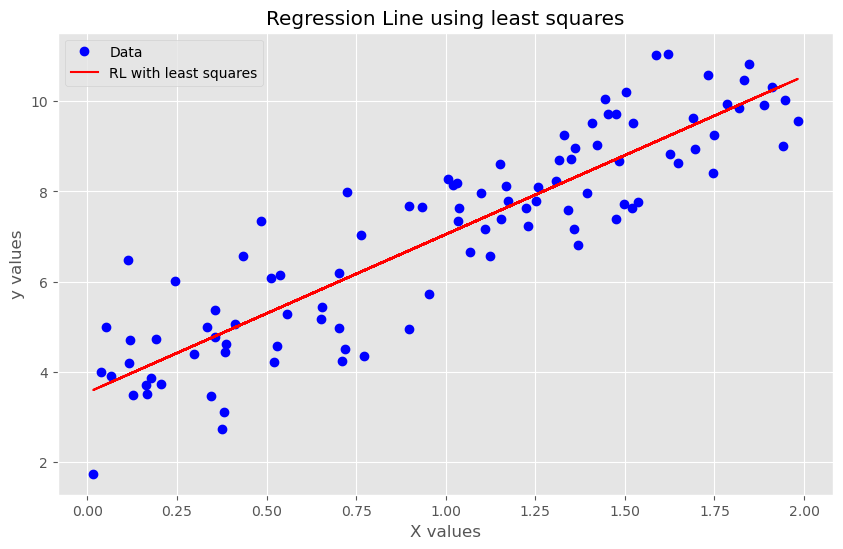

In [9]:
## model is trained --> now you can preict
y_pred_least = lin_reg.predict(X)   ## predict

## plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo', label='Data')
plt.plot(X, y_pred_least, c='r', label='RL with least squares')   ## y_pred_least
plt.title('Regression Line using least squares')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [10]:
## you can get the MSE & MAE & R2 score
mse_least_squares = mean_squared_error(y, y_pred_least)
mae_least_squares = mean_absolute_error(y, y_pred_least)
r2_least_squares = r2_score(y, y_pred_least)

print(f'MSE using Least Squares -->  {mse_least_squares: .4f}')
print(f'MAE using Least Squares --> {mae_least_squares: .4f}')
print(f'R2 score usign Least Squares -->  {r2_least_squares: .4f} %')

MSE using Least Squares -->   0.9948
MAE using Least Squares -->  0.8137
R2 score usign Least Squares -->   0.8021 %


In [11]:
## Gradient Descent algorithms in sklearn is called (SGD) --> Stochastic Gradient Descent (SGDRegressor) for regression
sgd_reg = SGDRegressor(random_state=123, penalty=None, eta0=0.1, max_iter=1000, tol=1e-3, shuffle=True)   ## an instance of the Class  
## you can tweak with the Hyperparameters of the Model 
## (penalty=None) --> No Regularization
## (suffle=True) --> to shuffle the dataset for better training with GD
## (max_iter) --> Stopping criteria, when to stop updating
## (tol) --> Stopping Criteria, will stop if cost is less than it even iterations is less than max_iter
## (eta0) --> Learning rate
## (random_state) --> like .seed in numpy, used to reproduce the same results when rerunning the code


## train the model
sgd_reg.fit(X, y.ravel())  ## required y to be vector .ravel()

SGDRegressor(eta0=0.1, penalty=None, random_state=123)

In [12]:
## model is trained, you can get the thetas it learned
## here in my dataset, I have one (theta_1) and (thetas_0)
theta_1 = sgd_reg.coef_
theta_0 = sgd_reg.intercept_

print('theta_1 --> ', theta_1)
print('theta_0 --> ', theta_0)

theta_1 -->  [3.53390499]
theta_0 -->  [3.5580575]


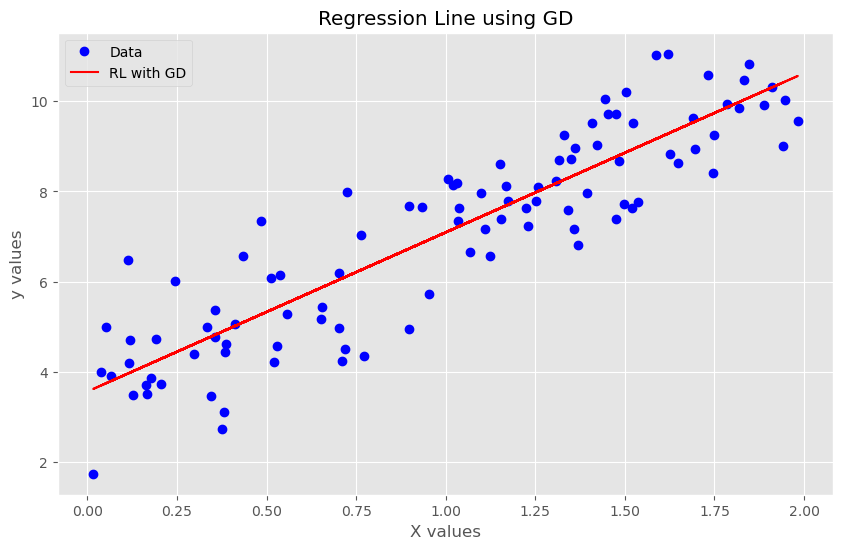

In [13]:
## try to predict
y_pred_sgd = sgd_reg.predict(X)

## plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo', label='Data')
plt.plot(X, y_pred_sgd, c='r', label='RL with GD')   ## y_pred_sgd
plt.title('Regression Line using GD')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [14]:
## you can get the MSE & MAE & R2 score
mse_sgd = mean_squared_error(y, y_pred_sgd)
mae_sgd = mean_absolute_error(y, y_pred_sgd)
r2_sgd = r2_score(y, y_pred_sgd)

print(f'MSE using GD -->  {mse_sgd: .4f}')
print(f'MAE using GD --> {mae_sgd: .4f}')
print(f'R2 score using GD -->  {r2_sgd: .4f} %')

MSE using GD -->   0.9970
MAE using GD -->  0.8138
R2 score using GD -->   0.8017 %


### Polynomial Regression

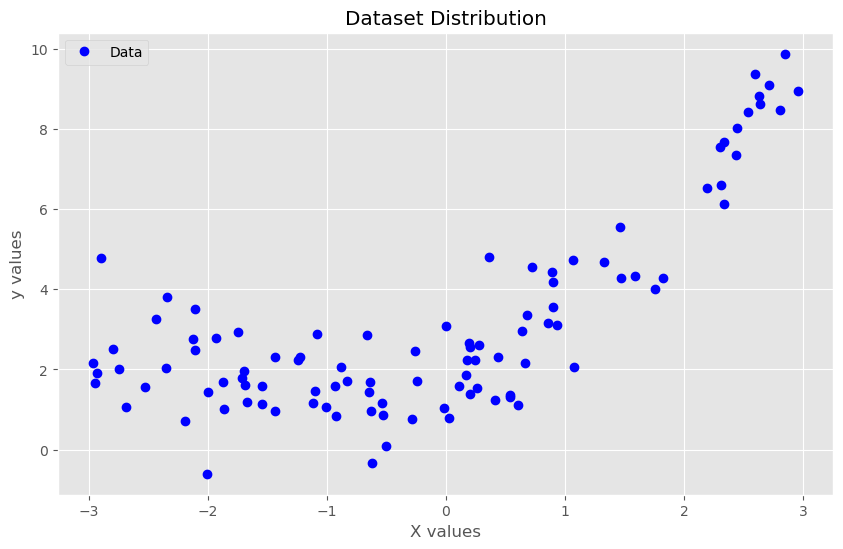

In [15]:
## Try random dataset to only show the idea and you can generalize to upper dimensions
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

## plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo', label='Data')
plt.title('Dataset Distribution')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [16]:
## Get the polynomial Features --> it will generate combination of new features according to required degree and number of features
poly_features = PolynomialFeatures(degree=2, include_bias=False)  ## an instance of the class

## fit the instance to the dataset and transform to new features which the model will be trained on
X_poly = poly_features.fit_transform(X)

print('X[0] --> ', X[0])
print('X_poly[0] --> ', X_poly[0])  ## return (X & X^2)

X[0] -->  [-0.83122852]
X_poly[0] -->  [-0.83122852  0.69094086]


In [17]:
## You then ready to train ordinary LinearRegression Model but the training Features will be X_poly
lin_reg_poly = LinearRegression()  ## Let the default Hyperparameter as it is
lin_reg_poly.fit(X_poly, y)  ## train

## you can get the thetas
## not only theta_1 --> we made (X & X^2) --> then we have (theta_1 X + theta_11 X^2)  respectively
print('Coeff -- ', lin_reg_poly.coef_)   
print('Intercept -- ', lin_reg_poly.intercept_)

## the Final equation of this Model
## y_pred = 2.15568 + 1.049 X + 0.4553745 X^2 

Coeff --  [[1.10298638 0.50072411]]
Intercept --  [1.91501129]


In [18]:
# predicting
y_pred_poly = lin_reg_poly.predict(X_poly)

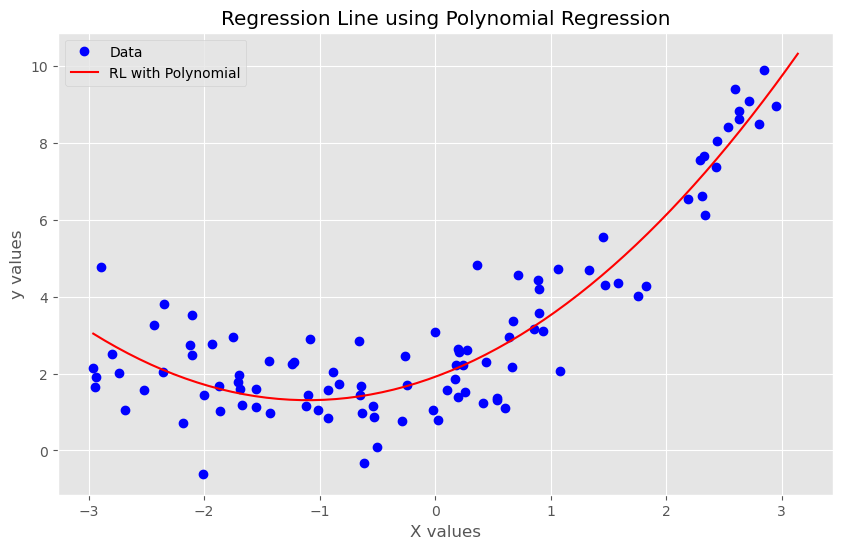

In [19]:
## some tricks for plotting the Curve 
## doing some tricks

X_grid = np.arange(min(X), max(X)+0.2, 0.1)  ## some range from the main Dataset (X)
X_grid = X_grid.reshape(-1,1)   ## reshape to be 2D array

## convert the above values with the Polynomial Features
X_grid_poly = poly_features.fit_transform(X_grid)  
y_grid_poly = lin_reg_poly.predict(X_grid_poly)

## plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'bo', label='Data')
plt.plot(X_grid, y_grid_poly, c='r', label='RL with Polynomial')   ## y_pred_poly --> Draw with (X_grid & y_grid_poly)
plt.title('Regression Line using Polynomial Regression')
plt.xlabel('X values')
plt.ylabel('y values')
plt.legend()
plt.show()